<a href="https://colab.research.google.com/github/Sazzads/ANN/blob/main/MNIAT_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense


Load dataset

In [92]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [93]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Actual label:  5


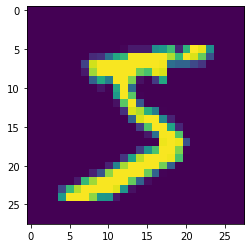

In [94]:
plt.imshow(x_train[0])
print("Actual label: ",y_train[0])

In [95]:
#prepare dataset
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

In [96]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [97]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255


In [98]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [99]:
y_train = keras.utils.np_utils.to_categorical(y_train,10)
y_test = keras.utils.np_utils.to_categorical(y_test,10)

In [100]:
#create ann
model=Sequential()
#input layer
model.add(Dense(128,activation='relu',input_shape=(784, )))
#hidden layer
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [102]:
adam=tf.keras.optimizers.Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [103]:
#loss
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

In [104]:
history=model.fit(x_train,y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test,y_test)
    
)

Epoch 1/12
469/469 [==============================] - 3s 6ms/step - loss: 0.3406 - accuracy: 0.9002 - val_loss: 0.1637 - val_accuracy: 0.9501
Epoch 2/12
469/469 [==============================] - 2s 5ms/step - loss: 0.1347 - accuracy: 0.9595 - val_loss: 0.1098 - val_accuracy: 0.9677
Epoch 3/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0933 - accuracy: 0.9716 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 4/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9785 - val_loss: 0.0849 - val_accuracy: 0.9734
Epoch 5/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0775 - val_accuracy: 0.9756
Epoch 6/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0814 - val_accuracy: 0.9751
Epoch 7/12
469/469 [==============================] - 2s 5ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 

In [105]:
model.save("./model.h5")

In [106]:
test_data=x_test[0]
print(test_data.shape)
test_data=test_data.reshape(1,784)
test_data.shape

(784,)


(1, 784)

In [107]:
pred=model.predict(test_data)

In [108]:
pred=np.argmax(pred,axis=1)

In [109]:
pred

array([7])

In [110]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)